# Creating and accessing a fit
This example shows you, how you can easily calculate and visualize a fit to your data

In [1]:
import numpy as np
import xarray as xr
import psyplot.project as psy
%matplotlib inline
%config InlineBackend.close_figures = False

First we start with some example data to make a linear regression from the equation
``y(x) = 4 * x + 30``

In [2]:
x = np.linspace(0, 100)
y = x * 4 + 30 + 50* np.random.normal(size=x.size)
ds = xr.Dataset({'x': xr.Variable(('experiment', ), x),
                 'y': xr.Variable(('experiment', ), y)})
ds

<xarray.Dataset>
Dimensions:  (experiment: 50)
Dimensions without coordinates: experiment
Data variables:
    x        (experiment) float64 0.0 2.041 4.082 6.122 ... 95.92 97.96 100.0
    y        (experiment) float64 45.66 -17.69 -17.76 ... 381.6 449.4 413.4

We can show this input data using the ``lineplot`` plot method from the psy-simple plugin:

/home/circleci/miniconda3/envs/docs/lib/python3.7/site-packages/psy_simple/plugin.py:423: MatplotlibDeprecationWarning: 
The validate_legend_loc function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  return {'loc': validate_legend_loc(value)}


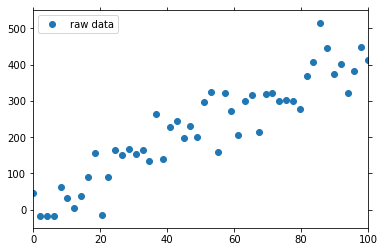

In [3]:
raw = psy.plot.lineplot(
    ds, name='y', coord='x', linewidth=0, marker='o', legendlabels='raw data', 
    legend='upper left')

The visualization of the fit is straight forward using the ``linreg`` plot method:

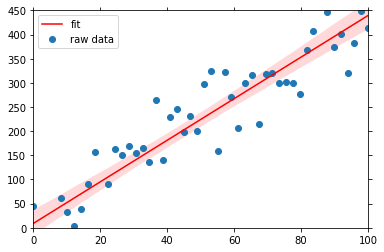

In [4]:
fit = psy.plot.linreg(ds, ax=raw.plotters[0].ax, name='y', coord='x', 
                      legendlabels='fit', color='red')
fit.share(raw[0], keys='legend')
fit.show()

The shaded red area displays the 95% confidence interval. To access the data for the fit, just use the ``plot_data`` attribute:

In [5]:
data = fit[0].psy.plotter.plot_data
data[0]

<xarray.DataArray 'y' (variable: 3, x: 100)>
array([[  9.05536297,  13.40316882,  17.75097466,  22.09878051,
         26.44658635,  30.7943922 ,  35.14219804,  39.49000389,
         43.83780973,  48.18561558,  52.53342142,  56.88122726,
         61.22903311,  65.57683895,  69.9246448 ,  74.27245064,
         78.62025649,  82.96806233,  87.31586818,  91.66367402,
         96.01147987, 100.35928571, 104.70709156, 109.0548974 ,
        113.40270324, 117.75050909, 122.09831493, 126.44612078,
        130.79392662, 135.14173247, 139.48953831, 143.83734416,
        148.18515   , 152.53295585, 156.88076169, 161.22856754,
        165.57637338, 169.92417923, 174.27198507, 178.61979091,
        182.96759676, 187.3154026 , 191.66320845, 196.01101429,
        200.35882014, 204.70662598, 209.05443183, 213.40223767,
        217.75004352, 222.09784936, 226.44565521, 230.79346105,
        235.14126689, 239.48907274, 243.83687858, 248.18468443,
        252.53249027, 256.88029612, 261.22810196, 265.57590781,
        269.92371365, 274.2715195 , 278.61932534, 282.96713119,
        287.31493703, 291.66274287, 296.01054872, 300.35835456,
        304.70616041, 309.05396625, 313.4017721 , 317.74957794,
        322.09738379, 326.44518963, 330.79299548, 335.14080132,
        339.48860717, 343.83641301, 348.18421885, 352.5320247 ,
...
        115.61007538, 119.4713666 , 123.29134002, 127.46848663,
        131.61345077, 135.6392097 , 139.79493072, 143.95065174,
        148.10435091, 152.25264166, 156.17064238, 160.05471952,
        163.77952786, 168.12088451, 172.01133623, 176.08289014,
        180.02704086, 184.40503898, 188.81168819, 192.98291131,
        197.05382473, 201.47576782, 205.66625392, 210.01133554,
        214.39601588, 218.71375464, 223.03810782, 227.54335206,
        232.05643283, 236.75103103, 241.01387725, 245.39000036,
        249.93825657, 254.42106704, 258.9880695 , 263.41653189,
        267.95214143, 272.33933129, 276.91598916, 281.76438355,
        286.46877118, 290.97573033, 295.51869278, 300.03461501,
        305.01167156, 309.72556147, 314.330591  , 318.89212425,
        323.48665535, 328.11838795, 332.71992025, 337.30939756,
        341.90997081, 346.50611147, 351.1363961 , 355.90679581,
        360.48820583, 365.08821344, 369.74084337, 374.4090632 ,
        379.09137207, 383.97660184, 388.86059882, 393.7422891 ,
        398.40867233, 402.90329413, 407.6149585 , 412.51376446,
        417.33503296, 422.25496159, 427.01541237, 431.61254668,
        436.20944259, 440.80117589, 445.66679445, 450.61375406,
        455.56071366, 460.50767326, 465.23585482, 470.21198276]])
Coordinates:
  * x         (x) float64 0.0 1.01 2.02 3.03 4.04 ... 96.97 97.98 98.99 100.0
  * variable  (variable) <U7 'y' 'min_err' 'max_err'
Attributes:
    slope:      4.304327786176036
    intercept:  9.055362973987158
    rsquared:   0.8582155109162602

You see, that there are new attributes, ``rsquared``, ``intercept`` and ``slope``, the characteristics of the fit.
As always with the dataset attributes in ``psyplot``, you can visualize them, for example in the legend:

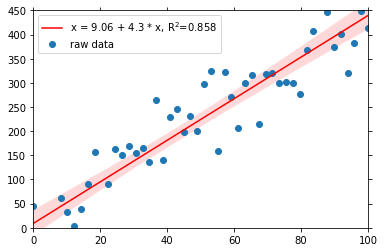

In [6]:
fit.update(legendlabels='%(yname)s = %(intercept).3g + %(slope).3g * %(xname)s, R$^2$=%(rsquared).3g')
fit.show()

To improve the fit, we can also force the line to go through a given fix point. For example here, we know, that the
fit crosses the y-line at 30:

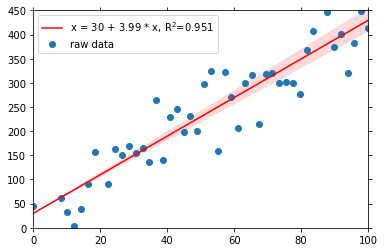

In [7]:
fit.update(fix=30)
fit.show()

That works for any other point as well. E.g. we also know, that the line goes through ``y = 4 * 10 + 30 = 70``:

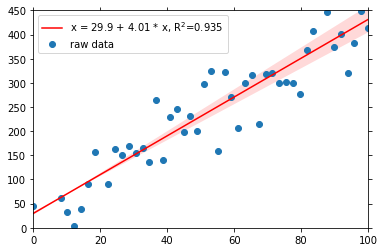

In [8]:
fit.update(fix=[(10, 70)])
fit.show()

For more informations, look into the formatoptions of the ``regression`` group

In [9]:
fit.summaries('regression')

xrange
    Specify the range for the fit to use for the x-dimension
yrange
    Specify the range for the fit to use for the y-dimension
line_xlim
    Specify how wide the range for the plot should be
p0
    Initial parameters for the :func:`scipy.optimize.curve_fit` function
fit
    Choose the linear fitting method
fix
    Force the fit to go through a given point
nboot
    Set the number of bootstrap resamples for the confidence interval
ci
    Draw a confidence interval
ideal
    Draw an ideal line of the fit


In [10]:
psy.close('all')